In [1]:
from lpi_python import adjusted_pnorm_error, lpi_optimal_permutation, lpi_distance, lpi_mean
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# regular error functions
def root_mean_squared_error(y_true, y_pred):
	return np.sqrt(np.average((y_true - y_pred) ** 2))

def mean_absolute_error(y_true, y_pred):
    return np.average(np.abs(y_pred - y_true))

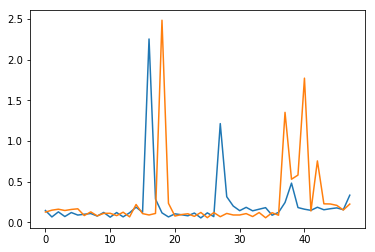

In [3]:
# example data
y_hat = np.array([0.146, 0.067, 0.129, 0.072, 0.121, 0.09, 0.1, 0.109, 0.078, 0.122, 0.064, 0.121, 0.068, 0.118, 0.187, 0.124, 2.252, 0.286, 0.117, 0.067, 0.105, 0.094, 0.081, 0.115, 0.055, 0.117, 0.071, 1.213, 0.315, 0.201, 0.144, 0.185, 0.142, 0.162, 0.181, 0.088, 0.123, 0.244, 0.482, 0.182, 0.162, 0.148, 0.186, 0.155, 0.168, 0.178, 0.156, 0.334])
y_true = np.array([0.127, 0.15, 0.162, 0.146, 0.159, 0.167, 0.084, 0.129, 0.08, 0.111, 0.112, 0.083, 0.125, 0.068, 0.22, 0.108, 0.091, 0.11, 2.482, 0.234, 0.078, 0.096, 0.106, 0.074, 0.122, 0.058, 0.121, 0.07, 0.11, 0.091, 0.091, 0.108, 0.072, 0.121, 0.057, 0.119, 0.088, 1.351, 0.53, 0.581, 1.771, 0.14, 0.755, 0.228, 0.226, 0.209, 0.152, 0.225])

plt.plot(np.stack([y_hat, y_true]).T)

In [4]:
# Adjusted Error Example
# Compare Adjusted Error with p=2 with RMSE
print("RMSE: %.2f" % root_mean_squared_error(y_true, y_hat))
print("Adjusted Error with omega=0: %.2f" % adjusted_pnorm_error(y_true, y_hat, omega=0, p=2))
print("Adjusted Error with omega=3: %.2f" % adjusted_pnorm_error(y_true, y_hat, omega=3, p=2))

# Compare Adjusted Error with p=1 with MAE
print("MAE: %.2f" % mean_absolute_error(y_true, y_hat))
print("Adjusted Error with omega=0: %.2f" % adjusted_pnorm_error(y_true, y_hat, omega=0, p=1))
print("Adjusted Error with omega=3: %.2f" % adjusted_pnorm_error(y_true, y_hat, omega=3, p=1))

RMSE: 0.58
Adjusted Error with omega=0: 0.58
Adjusted Error with omega=3: 0.32
MAE: 0.24
Adjusted Error with omega=0: 0.24
Adjusted Error with omega=3: 0.14


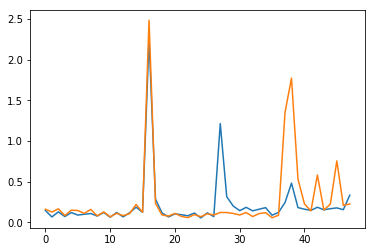

In [5]:
# Optimal Permutation Example
# Compare y_hat with optimal permutation pi of y_true
y_hat = np.array([0.146, 0.067, 0.129, 0.072, 0.121, 0.09, 0.1, 0.109, 0.078, 0.122, 0.064, 0.121, 0.068, 0.118, 0.187, 0.124, 2.252, 0.286, 0.117, 0.067, 0.105, 0.094, 0.081, 0.115, 0.055, 0.117, 0.071, 1.213, 0.315, 0.201, 0.144, 0.185, 0.142, 0.162, 0.181, 0.088, 0.123, 0.244, 0.482, 0.182, 0.162, 0.148, 0.186, 0.155, 0.168, 0.178, 0.156, 0.334])
pi = lpi_optimal_permutation(y_true, y_hat, omega=3)
plt.plot(np.stack([y_hat, pi]).T)

In [6]:
# Distance Example
# Compare 2-norm with lpi_distance
print("2-norm: %.2f" % np.linalg.norm(y_true-y_hat, ord=2))
print("LPI distance with omega=0: %.2f" % lpi_distance(y_true, y_hat, omega=0))
print("LPI distance with omega=2: %.2f" % lpi_distance(y_true, y_hat, omega=2))
print("LPI distance with omega=4: %.2f" % lpi_distance(y_true, y_hat, omega=4))

2-norm: 4.01
LPI distance with omega=0: 4.01
LPI distance with omega=2: 2.21
LPI distance with omega=4: 2.20


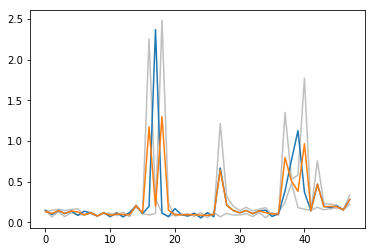

In [7]:
# Mean Example
adjusted_mean = lpi_mean(np.stack([y_hat, y_true]))
arithmetic_mean = np.mean(np.stack([y_hat, y_true]), axis=0)
plt.plot(np.stack(np.stack([y_hat, y_true]).T), color="grey", alpha=0.5)
plt.plot(np.stack([adjusted_mean, arithmetic_mean]).T)